# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [1]:
# Import libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import collections

In [2]:
# Your code here
data = pd.read_csv('data_all.csv', nrows=75000)

In [3]:
data = data.astype('int8')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Columns: 785 entries, e to 784
dtypes: int8(785)
memory usage: 56.1 MB


In [5]:
data.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data.shape

(75000, 785)

In [7]:
data.e.sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61])

In [8]:
etiquetes = {}

# 
for i, e in enumerate(data.e):
    if e not in etiquetes:
#         plt.imshow(data.iloc[i, 1:].values.reshape(28, 28))
#         plt.show()
        etiquetes[e] = i

etiquetes_sort = {}
for key in sorted(etiquetes.keys()):
    etiquetes_sort[key] = etiquetes[key]


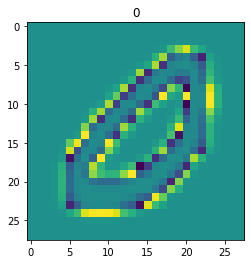

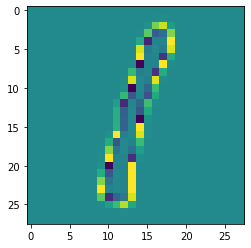

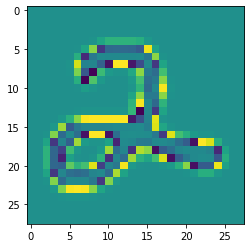

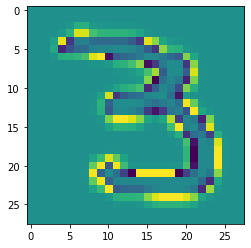

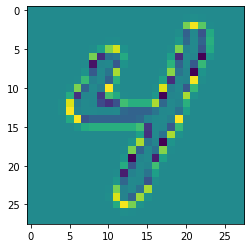

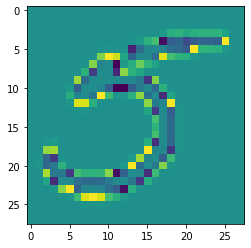

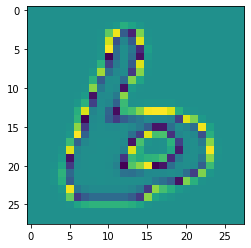

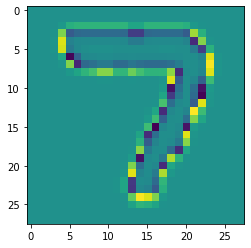

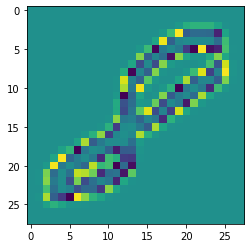

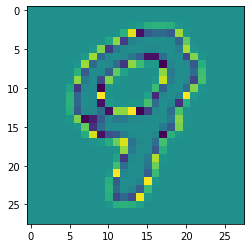

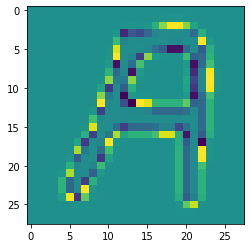

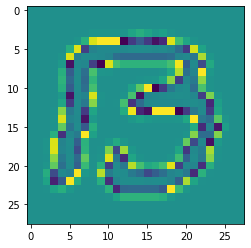

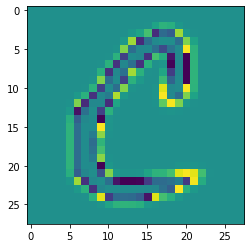

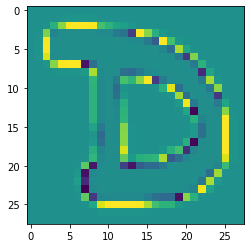

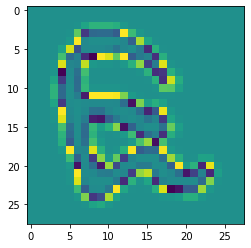

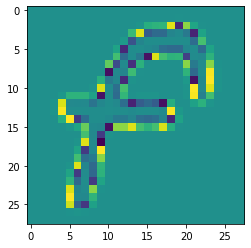

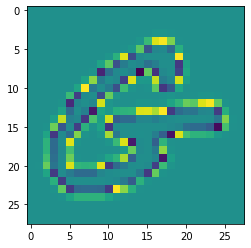

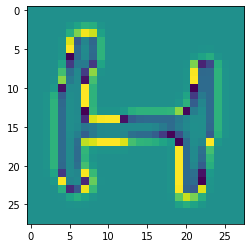

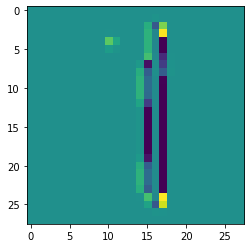

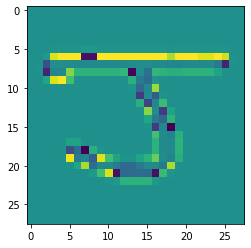

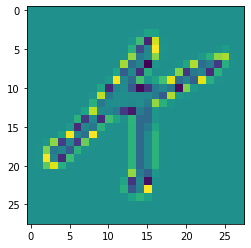

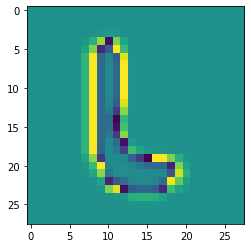

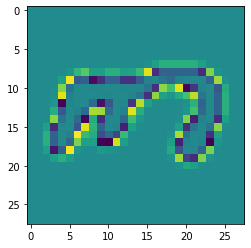

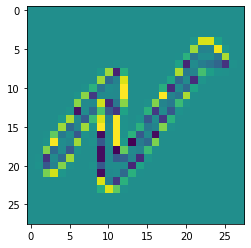

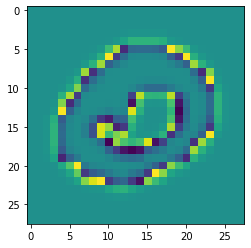

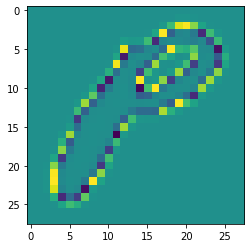

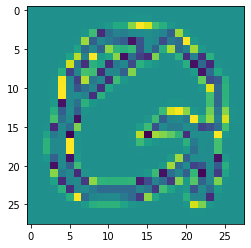

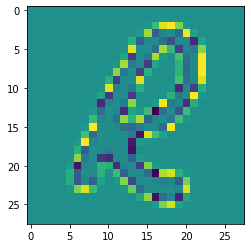

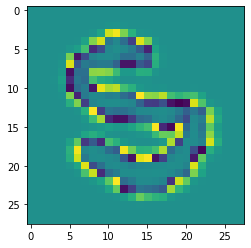

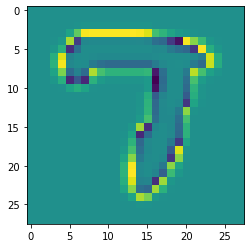

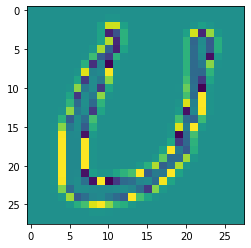

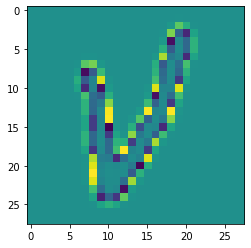

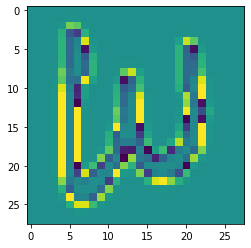

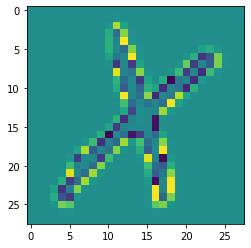

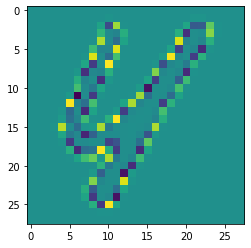

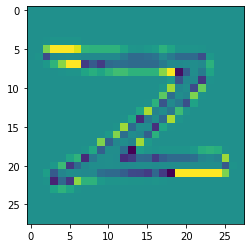

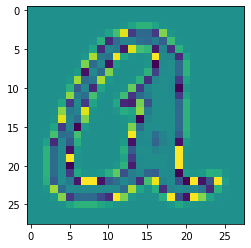

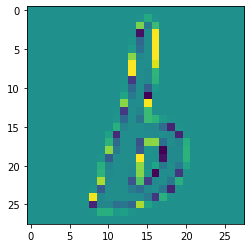

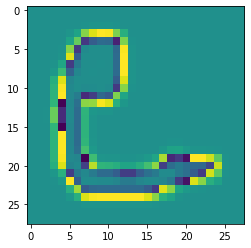

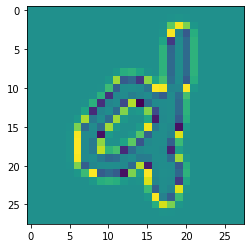

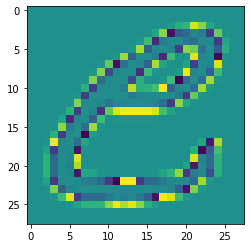

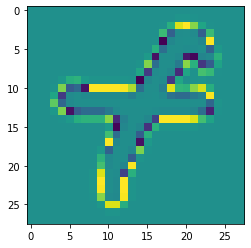

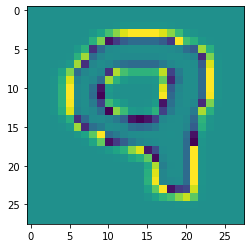

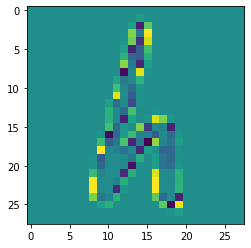

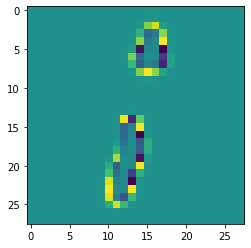

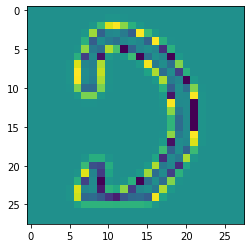

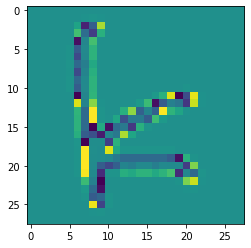

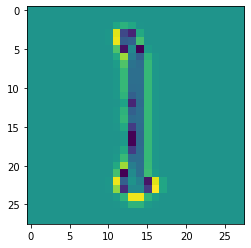

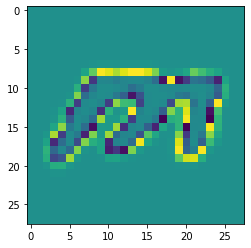

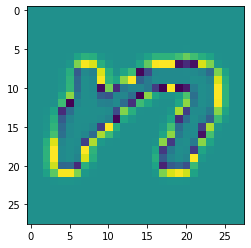

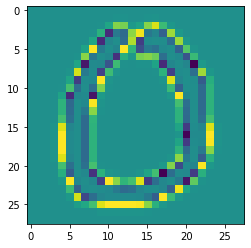

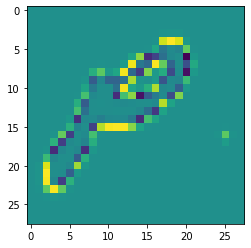

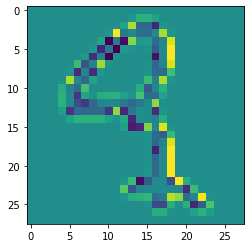

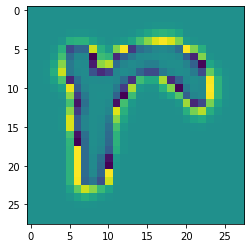

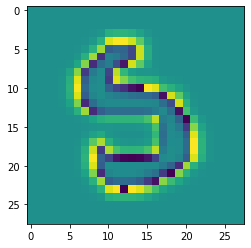

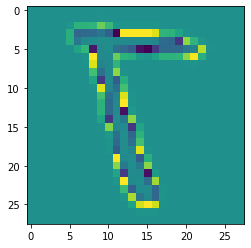

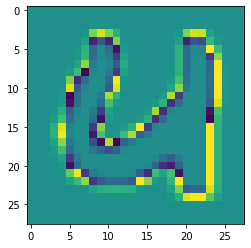

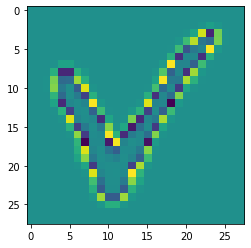

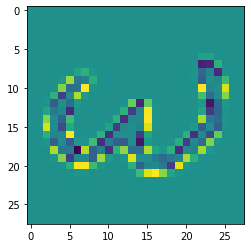

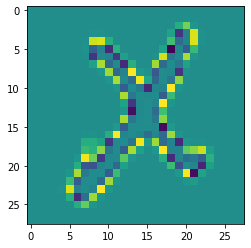

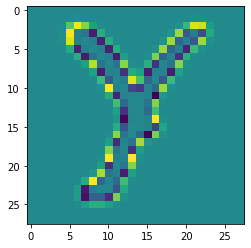

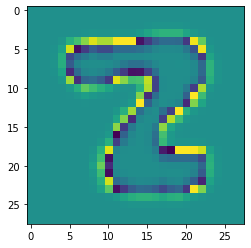

In [9]:
fig, ax = plt.subplots()
for k,v in etiquetes_sort.items():
    plt.imshow(data.iloc[v, 1:].values.reshape(28, 28))
    ax.set_title(f'{k}')
    plt.show()

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [10]:
upper_cases=data.loc[(data.e>=10)&(data.e<36)]
upper_cases = upper_cases.reset_index(drop = True)

In [11]:
X = upper_cases.drop('e', axis = 1)
y = upper_cases['e']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

X_train /= 255
x_test /= 255


In [18]:
LR_model = LogisticRegression(solver = 'lbfgs', 
                              max_iter = 2000, multi_class = 'multinomial').fit(X_train, y_train)
LR_model.score(X_train, y_train)

0.5752421157188975

In [19]:
y_pred = LR_model.predict(x_test)
LR_model.score(x_test, y_test)

0.41484607745779545

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

* Try to do the same thing with lowercases.

In [ ]:
# Your code here
lower_cases = data.loc[data.e <= 36]
lower_cases = lower_cases.reset_index(drop = True)

In [ ]:
X = lower_cases.drop('e', axis = 1)
y = lower_cases['e']

In [ ]:
y = np.array(y).reshape(len(y), )

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.svm import SVC

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(x_test)

svm_model = SVC(kernel = 'rbf', gamma = 'scale').fit(X_train, y_train)
svm_model.score(X_train, y_train)

In [ ]:
y_pred = svm_model.predict(x_test)
print(x_test.shape)
svm_model.score(y_test, y_pred)

In [ ]:
y_test=y_test.reshape(-1,1)
print(y_pred.shape)
svm_model.score(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

* Try to do the same thing with numbers.

In [20]:
numbers = data.loc[data.e <= 9]
numbers = numbers.reset_index(drop = True)
X = numbers.drop('e', axis = 1)
y = numbers['e']

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

RFC_model = RandomForestClassifier(n_estimators=1000).fit(X_train, y_train)

In [ ]:
RFC_model.score(X_train, y_train)

In [21]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

X_train /= 255
x_test /= 255

LR_model = LogisticRegression(solver = 'lbfgs', 
                              max_iter = 2000, multi_class = 'multinomial').fit(X_train, y_train)
LR_model.score(X_train, y_train)

0.6600046711821428